**What is the exceedence threshold**

***hi tis!***

In [2]:
import Pkg
Pkg.activate(".")
Pkg.instantiate()

  Activating project at `~/Desktop/SLR-to-BI-4750`


In [3]:
using Random # random number generation
using Distributions # probability distributions and interface
using Statistics # basic statistical functions, including mean
using Plots # plotting
using DataFrames
# using Measures
# using MarkdownTables
using XLSX
using CSV
using Dates
using StatsModels
using GLM

In [4]:
using StatsBase # statistical quantities like mean, median, etc
using StatsPlots # some additional statistical plotting tools
using Optim # optimization tools

In [5]:
# load historical data
history = CSV.read("data/CO-OPS_8518750_met.csv", DataFrame)
# MSL = Mean Sea Level Rise
# rename!(history, "MSL (m)" => "MSL")
first(history, 5)

Row,Date,Time (GMT),Highest,MHHW (m),MHW (m),MSL (m),MTL (m),MLW (m),MLLW (m),Lowest (m),Inf
,String15,Time,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,1950/01/01,00:00:00,0.836,NaN,0.373,-0.258,-0.285,-0.944,NaN,-1.45,0
2,1950/02/01,00:00:00,1.141,NaN,0.419,-0.206,-0.234,-0.886,NaN,-1.633,0
3,1950/03/01,00:00:00,0.928,NaN,0.297,-0.34,-0.365,-1.026,NaN,-1.755,0
4,1950/04/01,00:00:00,0.989,NaN,0.483,-0.179,-0.197,-0.877,NaN,-1.297,0
5,1950/05/01,00:00:00,0.989,NaN,0.507,-0.17,-0.188,-0.883,NaN,-1.206,0


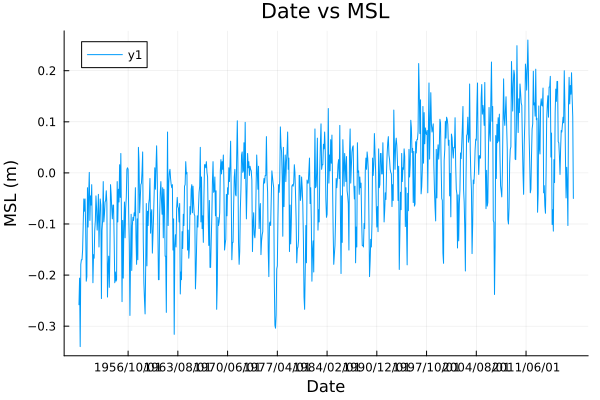

In [27]:
plot(history.Date, history."MSL (m)", xlabel="Date", ylabel="MSL (m)", title="Date vs MSL")

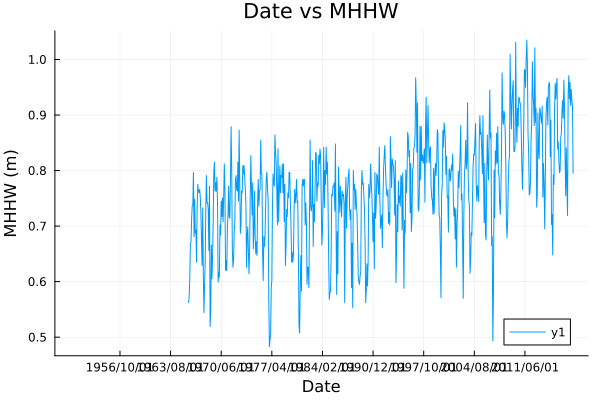

In [28]:
plot(history.Date, history."MHHW (m)", xlabel="Date", ylabel="MHHW (m)", title="Date vs MHHW")

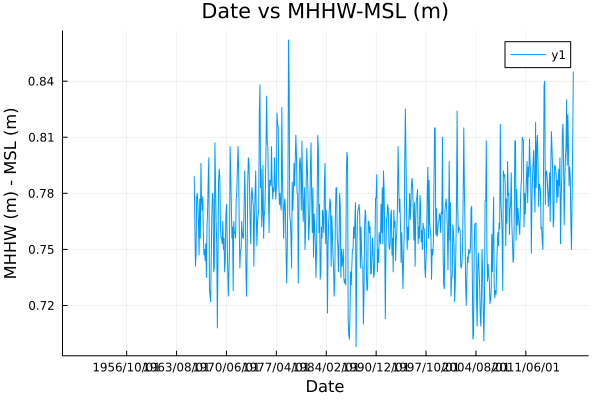

In [29]:
plot(history.Date, history."MHHW (m)"-history."MSL (m)", xlabel="Date", ylabel="MHHW (m) - MSL (m)", title="Date vs MHHW-MSL (m)")

***Lets first set an arbitrary threshold at 0.2m and mark the exceeding values for current MHHW values***


The max exceedance happens on 2011-09-01 at height 0.26


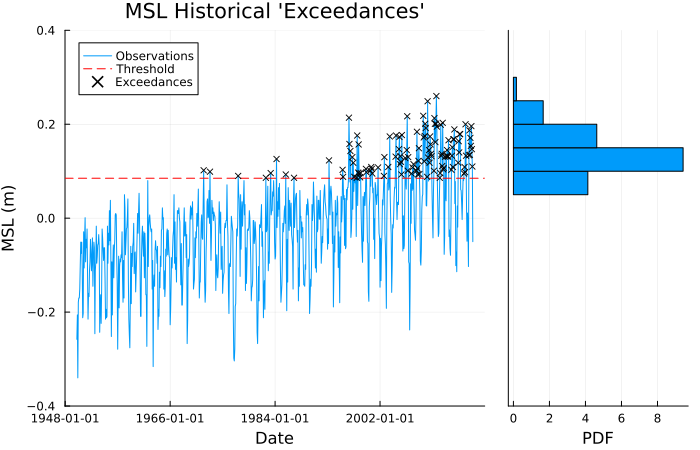

In [23]:
thresh = 0.085
p1 = plot(history.Date, history."MSL (m)", xlabel="Date", ylabel="MSL (m)", title="MSL Historical 'Exceedances'", label= "Observations") #, xticks=(collect(Date(1950, 1, 1):Year(10):Date(2100, 1, 1)), string.(1950:10:2100))

# history.Date = Date.(history.Date, "yyyy/mm/dd")



hline!([thresh], color=:red, linestyle=:dash, label="Threshold")
#put the xs on
scatter!(history.Date[history."MSL (m)" .> thresh],history."MSL (m)"[history."MSL (m)" .> thresh], markershape=:x, color=:black, markersize=3, label="Exceedances")

#now find the max exceedance, this is a v bad day
max_exceedance = maximum(history."MSL (m)"[history."MSL (m)" .> thresh])
max_idx = argmax(history."MSL (m)"[history."MSL (m)" .> thresh]) #finds the vector position where max exceedance happens
max_date = history.Date[history."MSL (m)" .> thresh][max_idx] #records the date at that vector position

# Add the maximum exceedance to the plot with a bigger red "x"
# scatter!([max_date], [max_exceedance], markershape=:x, color=:red, markersize=10, label="Max Exceedance")

println("The max exceedance happens on $(max_date) at height $(max_exceedance)")


p2 = histogram(
    history."MSL (m)"[history."MSL (m)" .> thresh],
    normalize=:pdf,
    orientation=:horizontal,
    label=:false,
    xlabel="PDF",
    ylabel="",
    yticks=[]
)

l = @layout [a{0.7w} b{0.3w}]
plot(p1, p2; layout=l, link=:y, ylims=(-0.4, 0.4))
plot!(size=(700, 450))

In [ ]:
p1 = plot(history.Date, history."MSL (m)", xlabel="Year", ylabel="MSL (m)", title="MSL Historical 'Exceedances'", label="Observations")

xticks!(history.Date[1:100:end], year.(history.Date[1:100:end]))  


***We can use the above code on out MSL predictions. It will show us where the highest exceedance point is. Then we can use this as our levee installation heigh. Which will change based weight of the SSPs***